In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
%matplotlib inline

In [2]:
data=pd.read_csv('US.csv')

In [3]:
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,08-02-2016 00:37,08-02-2016 06:37,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,08-02-2016 05:56,08-02-2016 11:56,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,08-02-2016 06:15,08-02-2016 12:15,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,08-02-2016 06:51,08-02-2016 12:51,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,08-02-2016 07:53,08-02-2016 13:53,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,A-1048571,2,14-08-2021 22:52,14-08-2021 23:26,39.073344,-94.378826,39.077939,-94.380343,0.328,Stationary traffic on MO-291 - MO-78 from E Gu...,...,False,False,False,False,False,False,Night,Night,Night,Night
1048571,A-1048572,2,28-07-2021 07:40,28-07-2021 09:24,41.245766,-74.031937,41.212956,-74.032805,2.267,Slow traffic on Palisades Interstate Pkwy S fr...,...,False,False,False,False,False,False,Day,Day,Day,Day
1048572,A-1048573,2,21-10-2021 10:48,21-10-2021 13:27,35.185344,-80.898465,35.180070,-80.887227,0.732,Slow traffic from W Tyvola Rd (Billy Graham Pk...,...,False,False,False,False,False,False,Day,Day,Day,Day
1048573,A-1048574,2,12-11-2021 18:15,12-11-2021 19:32,25.921157,-80.293117,25.921157,-80.292967,0.009,Incident on NW 163RD ST EB near NW 57TH AVE Dr...,...,False,False,False,False,True,False,Night,Night,Day,Day


In [4]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
len(data)

1048575

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1048575 non-null  object 
 1   Severity               1048575 non-null  int64  
 2   Start_Time             1048575 non-null  object 
 3   End_Time               1048575 non-null  object 
 4   Start_Lat              1048575 non-null  float64
 5   Start_Lng              1048575 non-null  float64
 6   End_Lat                1048575 non-null  float64
 7   End_Lng                1048575 non-null  float64
 8   Distance(mi)           1048575 non-null  float64
 9   Description            1048575 non-null  object 
 10  Number                 433398 non-null   float64
 11  Street                 1048574 non-null  object 
 12  Side                   1048575 non-null  object 
 13  City                   1048520 non-null  object 
 14  County            

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Severity,1048575.0,2.119283,0.431510,2.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,1048575.0,35.841309,5.388367,24.566027,32.837850,35.613523,39.921889,49.000580
Start_Lng,1048575.0,-95.185732,17.857320,-124.548074,-117.536967,-87.693040,-80.292830,-67.113167
End_Lat,1048575.0,35.841473,5.388549,24.566013,32.837509,35.615782,39.922290,49.075000
End_Lng,1048575.0,-95.185433,17.857116,-124.545748,-117.537960,-87.693040,-80.292893,-67.109242
Distance(mi),1048575.0,0.805652,1.525762,0.000000,0.107000,0.335000,0.890000,151.525000
Number,433398.0,7379.579730,14450.352867,1.000000,1246.000000,3951.000000,9085.000000,961051.000000
Temperature(F),1026829.0,65.790716,17.354721,-23.000000,55.000000,68.000000,79.000000,196.000000
Wind_Chill(F),834453.0,64.127613,19.730705,-44.000000,53.000000,68.000000,79.000000,196.000000
Humidity(%),1025847.0,63.591349,22.492491,1.000000,48.000000,65.000000,82.000000,100.000000


In [8]:
data.isna().sum().sort_values(ascending=False)

Number                   615177
Precipitation(in)        231683
Wind_Chill(F)            214122
Wind_Speed(mph)           57687
Weather_Condition         22892
Humidity(%)               22728
Wind_Direction            22626
Visibility(mi)            22534
Temperature(F)            21746
Pressure(in)              18585
Weather_Timestamp         15516
Airport_Code               3647
Nautical_Twilight          1662
Civil_Twilight             1662
Sunrise_Sunset             1662
Astronomical_Twilight      1662
Timezone                   1026
Zipcode                     435
City                         55
Street                        1
End_Time                      0
Start_Time                    0
Start_Lat                     0
Turning_Loop                  0
Give_Way                      0
Traffic_Signal                0
Traffic_Calming               0
Stop                          0
Station                       0
Roundabout                    0
Railway                       0
No_Exit 

In [9]:
missing_percentage=data.isna().sum().sort_values(ascending=False)/len(data)

In [10]:
missing_percentage

Number                   5.866791e-01
Precipitation(in)        2.209503e-01
Wind_Chill(F)            2.042028e-01
Wind_Speed(mph)          5.501466e-02
Weather_Condition        2.183153e-02
Humidity(%)              2.167513e-02
Wind_Direction           2.157786e-02
Visibility(mi)           2.149012e-02
Temperature(F)           2.073862e-02
Pressure(in)             1.772405e-02
Weather_Timestamp        1.479722e-02
Airport_Code             3.478054e-03
Nautical_Twilight        1.585008e-03
Civil_Twilight           1.585008e-03
Sunrise_Sunset           1.585008e-03
Astronomical_Twilight    1.585008e-03
Timezone                 9.784708e-04
Zipcode                  4.148487e-04
City                     5.245214e-05
Street                   9.536752e-07
End_Time                 0.000000e+00
Start_Time               0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Give_Way                 0.000000e+00
Traffic_Signal           0.000000e+00
Traffic_Calm

<AxesSubplot:>

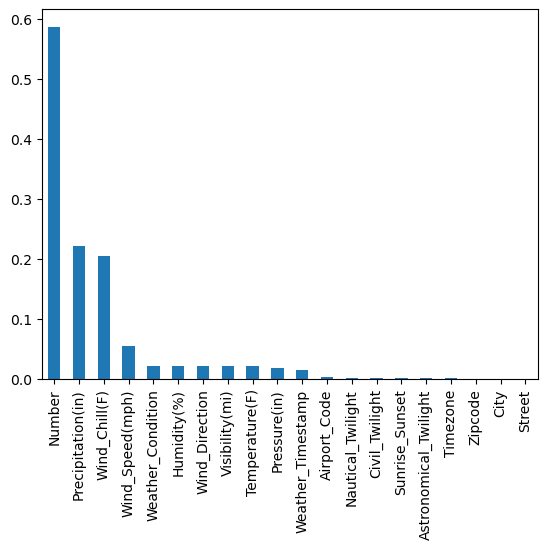

In [11]:
missing_percentage[missing_percentage!=0].plot(kind='bar')

In [12]:
data = data.fillna(missing_percentage.median())
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,08-02-2016 00:37,08-02-2016 06:37,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,08-02-2016 05:56,08-02-2016 11:56,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,08-02-2016 06:15,08-02-2016 12:15,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,08-02-2016 06:51,08-02-2016 12:51,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,08-02-2016 07:53,08-02-2016 13:53,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,A-1048571,2,14-08-2021 22:52,14-08-2021 23:26,39.073344,-94.378826,39.077939,-94.380343,0.328,Stationary traffic on MO-291 - MO-78 from E Gu...,...,False,False,False,False,False,False,Night,Night,Night,Night
1048571,A-1048572,2,28-07-2021 07:40,28-07-2021 09:24,41.245766,-74.031937,41.212956,-74.032805,2.267,Slow traffic on Palisades Interstate Pkwy S fr...,...,False,False,False,False,False,False,Day,Day,Day,Day
1048572,A-1048573,2,21-10-2021 10:48,21-10-2021 13:27,35.185344,-80.898465,35.180070,-80.887227,0.732,Slow traffic from W Tyvola Rd (Billy Graham Pk...,...,False,False,False,False,False,False,Day,Day,Day,Day
1048573,A-1048574,2,12-11-2021 18:15,12-11-2021 19:32,25.921157,-80.293117,25.921157,-80.292967,0.009,Incident on NW 163RD ST EB near NW 57TH AVE Dr...,...,False,False,False,False,True,False,Night,Night,Day,Day


In [13]:
data.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

In [14]:
data.City.nunique()

10078

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_data = data.select_dtypes(include=numerics)
len(numeric_data.columns)

14

In [16]:
cities = data.City.unique()

In [17]:

len(cities)

10078

In [18]:
cities[:50]

array(['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg',
       'Cleveland', 'Lima', 'Westerville', 'Jamestown', 'Freeport',
       'Columbus', 'Toledo', 'Roanoke', 'Ft Mitchell', 'Edinburgh',
       'Fairborn', 'Shelbyville', 'Greensburg', 'Saint Paul',
       'Parkersburg', 'Indianapolis', 'Dundee', 'Jeffersonville',
       'Pittsburgh', 'Lewis Center', 'Dunkirk', 'Redkey', 'Milton',
       'Willshire', 'Straughn', 'Cambridge Springs', 'Fremont',
       'Louisville', 'South Charleston', 'Edinboro', 'Buckhannon',
       'Lockbourne', 'Painesville', 'Washington', 'Dunbar', 'Angola',
       'Edon', 'Medina', 'De Mossville', 'New Albany', 'Charleston',
       'Fort Wayne', 'Burnsville', 'Bedford', 'Clarksville'], dtype=object)

In [19]:
cities_by_accident= data['City'].value_counts()

In [20]:
cities_by_accident

Miami            46971
Orlando          25984
Los Angeles      23048
Dallas           18044
Houston          16985
                 ...  
Schroeder            1
Silver Gate          1
Warden               1
Sandy Level          1
Marion Center        1
Name: City, Length: 10078, dtype: int64

Which are the top 20 cities by accident in USA?


<AxesSubplot:>

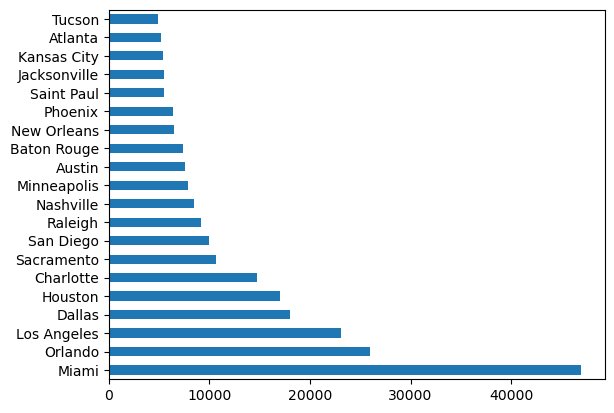

In [21]:
cities_by_accident[:20].plot(kind= 'barh')

In [22]:
cities_with_most_accident = cities_by_accident[cities_by_accident>1000]
cities_with_fewer_accident = cities_by_accident[cities_by_accident<1000]

In [23]:
cities_with_most_accident

Miami          46971
Orlando        25984
Los Angeles    23048
Dallas         18044
Houston        16985
               ...  
Sylmar          1023
Tyler           1008
Escondido       1003
Knoxville       1002
Salinas         1002
Name: City, Length: 143, dtype: int64

In [24]:
 cities_with_fewer_accident

Riverview        999
Mesquite         996
Summerville      989
Anderson         986
Tallahassee      983
                ... 
Schroeder          1
Silver Gate        1
Warden             1
Sandy Level        1
Marion Center      1
Name: City, Length: 9935, dtype: int64

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

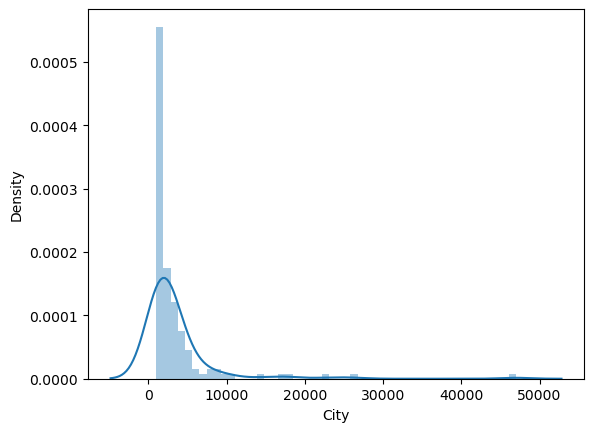

In [25]:
sns.distplot(cities_with_most_accident)

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

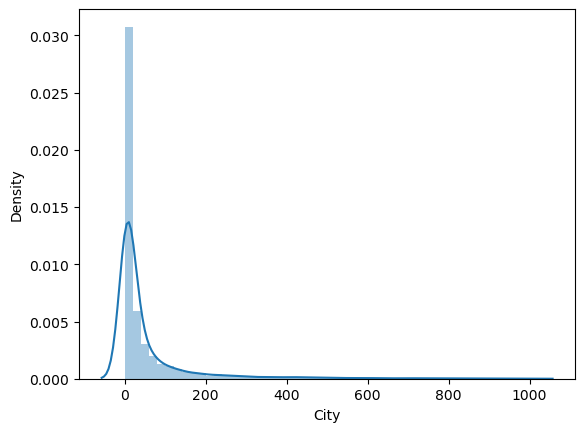

In [26]:
sns.distplot(cities_with_fewer_accident)

In [27]:
import folium
from folium.plugins import HeatMap

In [29]:
lat , lon = data.Start_Lat[0], data.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [32]:
lat_long_combine= list(zip(list(data.Start_Lat), list(data.Start_Lng)))

In [33]:
map= folium.Map()
HeatMap(lat_long_combine[:1000]).add_to(map)

map